<div style="text-align: right"> 29.11.2019</div>

***Name: Daniel Leube*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [1]:
import numpy as np
def numIntegr(p, w, l, dt, i): # Funktion für die numerische Integration, Parameter: phi0, omega0, Pendellaenge l, dt, Anz. d Integrationsschritte i
    pt = [(p)] # Liste für die Bahnkurvenpunkte mit Startwert p0
    for i in range(0,i): # Berechnung der nächsten vier Punkte
        p = p + w * dt # Gleichung 3
        w = w + -9.81 * np.sin(p) * dt # Gleichung 4
        pt.append(p)
    return pt # Rueckgabewert der Funktion: Liste der Bahnkurvenpunkte
#print(numIntegr(np.pi/4,0, 1, 0.002,3000))

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


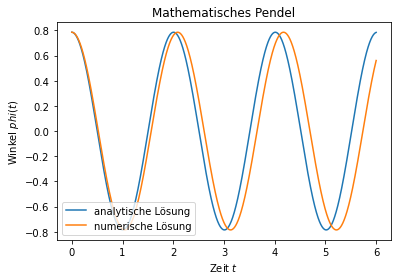

In [2]:
import matplotlib.pyplot as plt
# Anfangsbedingungen
p0 = np.pi/4 # Winkel phi0
w0 = 0 # Winkelgeschwindigkeit omega0
a = 9.81 # Erdbeschleunigung
dt = 0.002 # Zeitschritt
i = 3000 # Anz. Integrationsschritte
l = 1 # Pendellaenge

t = np.arange(0, (i+1)*dt, dt)
pAnalytic = p0 * np.cos(np.sqrt(a/l) * t)

pNumeric = numIntegr(p0,w0,l,dt,i)
tNumeric = np.arange(0, (i+1)*dt, dt)

fig, ax = plt.subplots()

ax.set_title("Mathematisches Pendel")  # Titel
ax.plot(t, pAnalytic, label='analytische Lösung')
ax.plot(tNumeric, pNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $phi(t)$")

plt.legend(loc=3)
plt.show()

Mir fällt beim Vergleich auf: Die numerische Lösung liefert eine größere Periodenlänge als die analytische Lösung mit Kleinwinkelnäherung. 

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

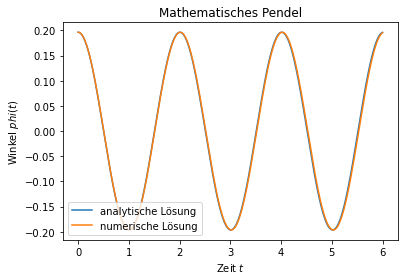

In [3]:
# Anfangsbedingungen
p0 = np.pi/16 # Winkel phi0
w0 = 0 # Winkelgeschwindigkeit omega0
a = 9.81 # Erdbeschleunigung
dt = 0.002 # Zeitschritt
i = 3000 # Anz. Integrationsschritte
l = 1 # Pendellaenge

t = np.arange(0, (i+1)*dt, dt)
pAnalytic = p0 * np.cos(np.sqrt(a/l) * t)

pNumeric = numIntegr(p0,w0,l,dt,i)
tNumeric = np.arange(0, (i+1)*dt, dt)

fig, ax = plt.subplots()

ax.set_title("Mathematisches Pendel")  # Titel
ax.plot(t, pAnalytic, label='analytische Lösung')
ax.plot(tNumeric, pNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $phi(t)$")

plt.legend(loc=3)
plt.show()

Ich beobachte: Für phi0 = pi/16 stimmen die numerische Lösung und die analytsiche Lösung mit Kleinwinkelnäherung überein. Das deutet darauf hin, dass die Unterschiede in b) tatsächlich auf die Kleinwinkelnäherung zurückzuführen sind, und dass die Kleinwinkelnäherung für phi0 = pi/16 eine gute Näherung darstellt.